In [4]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
import numpy as np
from keras.layers.core import Lambda
from keras import backend as K
from keras.optimizers import SGD
from keras import regularizers
import matplotlib.pyplot as plt


#import data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
# set parameter
weight_decay = 0.0005
nb_epoch=60
batch_size=32


Displaying data on a dataset

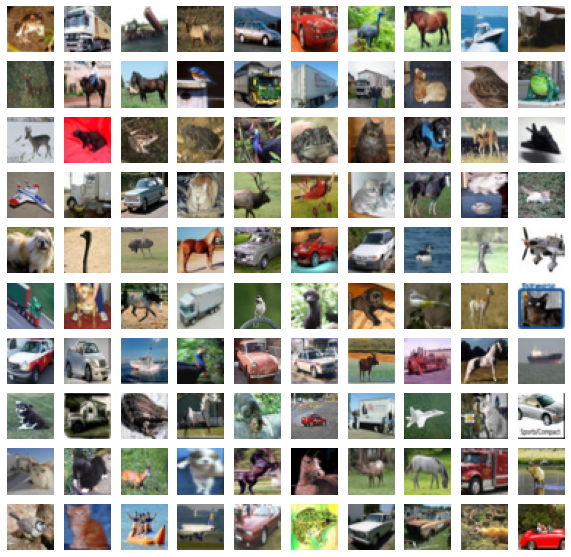

In [6]:
plt.figure(figsize = (10,10))
for i in range(100):
  plt.subplot(10,10,1+i)
  plt.axis('off')
  plt.imshow(x_train[i], cmap = 'gray')

In [ ]:
#layer1 32*32*3
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same',
input_shape=(32,32,3),kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
#layer2 32*32*64
model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#layer3 16*16*64
model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#layer4 16*16*128
model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#layer5 8*8*128
model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#layer6 8*8*256
model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#layer7 8*8*256
model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#layer8 4*4*256
model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#layer9 4*4*512
model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#layer10 4*4*512
model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#layer11 2*2*512
model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#layer12 2*2*512
model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#layer13 2*2*512
model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
#layer14 1*1*512
model.add(Flatten())
model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
#layer15 512
model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
#layer16 512
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
# 10

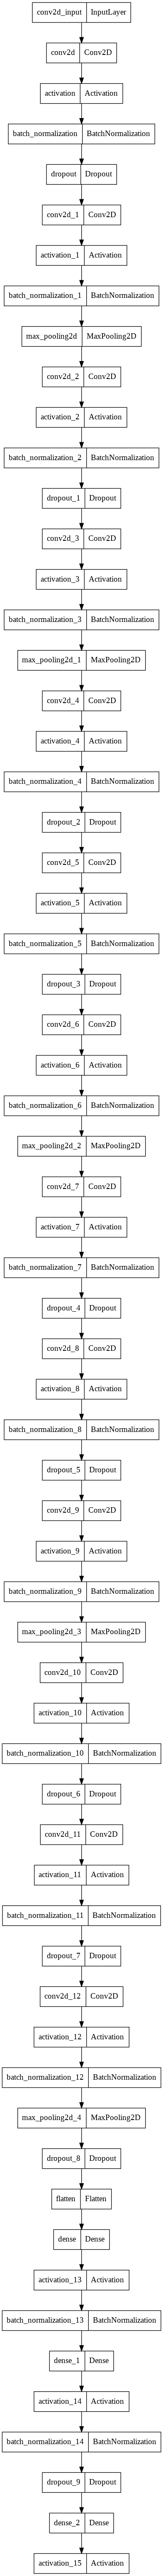

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
model.summary()
history = model.fit(x_train,y_train,epochs=nb_epoch, batch_size=batch_size,
             validation_split=0.1, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 32, 32, 64)        0         
                                                        

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/60
1407/1407 [==============================] - 62s 37ms/step - loss: 7.2095 - accuracy: 0.1810 - val_loss: 6.3634 - val_accuracy: 0.1690
Epoch 2/60
1407/1407 [==============================] - 50s 36ms/step - loss: 5.5738 - accuracy: 0.2779 - val_loss: 5.6247 - val_accuracy: 0.2110
Epoch 3/60
1407/1407 [==============================] - 51s 36ms/step - loss: 4.4070 - accuracy: 0.3402 - val_loss: 4.3443 - val_accuracy: 0.3318
Epoch 4/60
1407/1407 [==============================] - 51s 36ms/step - loss: 3.5860 - accuracy: 0.4196 - val_loss: 3.5404 - val_accuracy: 0.3722
Epoch 5/60
1407/1407 [==============================] - 50s 36ms/step - loss: 2.9590 - accuracy: 0.5026 - val_loss: 3.0464 - val_accuracy: 0.4194
Epoch 6/60
1407/1407 [==============================] - 50s 36ms/step - loss: 2.4812 - accuracy: 0.5664 - val_loss: 2.3394 - val_accuracy: 0.5798
Epoch 7/60
1407/1407 [==============================] - 50s 36ms/step - loss: 2.1284 - accuracy: 0.6139 - val_loss: 1.9056 -

In [ ]:
# save model
model.save("vgg16_cifar10_model.h5")

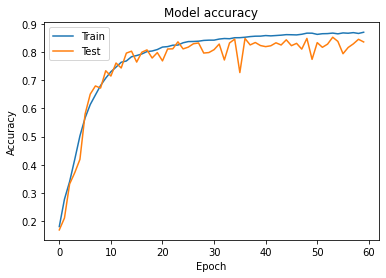

In [ ]:
import matplotlib.pyplot as plt
# print accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

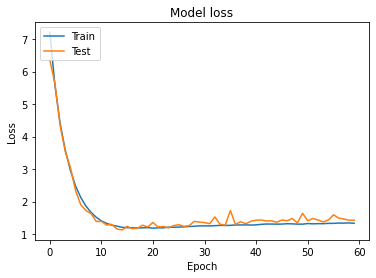

In [ ]:
# print loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","ship"]

In [ ]:
# Confusion matrix result

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
Y_pred = model.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print()
print("Confusion matrix")
print(cm)

# Visualizing of confusion matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix',cmap = plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 30)
  plt.yticks(tick_marks, classes)
  
  if normalize:
    cm = cm.astype('float') / cm.sum(axis =1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')
  
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment = 'center',
             color = 'white' if cm[i, j] > thresh else 'black')
  plt.tight_layout


313/313 - 3s - 3s/epoch - 10ms/step

Confusion matrix
[[881   6  27  20   3   0   2   2  55   4]
 [  7 962   1   4   0   0   1   0  10  15]
 [ 49   3 758  66  37  17  56   7   5   2]
 [ 19   3  29 806  24  49  49  10   6   5]
 [ 15   0  21  55 863   8  20  14   3   1]
 [  8   3  39 226  25 654  23  17   3   2]
 [  5   2  18  55  11   2 900   0   7   0]
 [ 30   3  26  59  45  22   8 803   1   3]
 [ 57  11   8   8   3   0   2   1 901   9]
 [ 29 115   4  12   0   2   5   4  26 803]]


Confusion matrix, without normalization


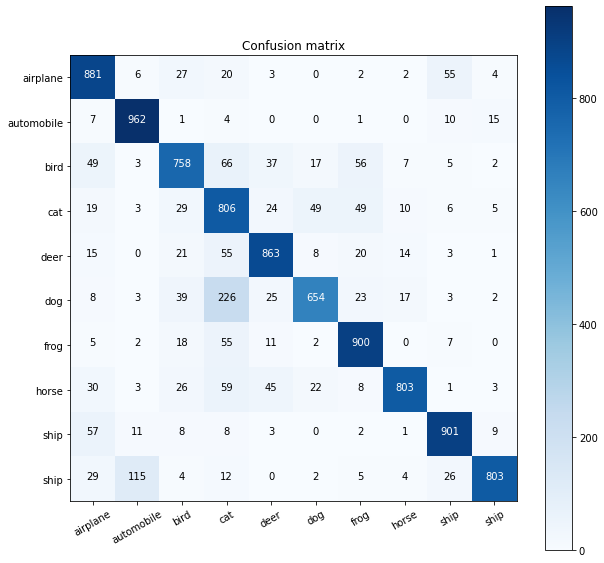

In [ ]:
plt.figure(figsize = (10,10))
plot_confusion_matrix(cm, classes)